- Write  a computer program capable of reducing the number of intensity levels  in an image from 256 to 2, in integer powers of 2. The desired number of  intensity levels needs to be a variable input to your program.

- Using  any programming language you feel comfortable with (it is though  recommended to use the provided free Matlab), load an image and then  perform a simple spatial 3x3 average of image pixels. In other words,  replace the value of every pixel by the average of the values in its 3x3  neighborhood. If the pixel is located at (0,0), this means averaging  the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0),  (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the  image boundaries. Repeat the process for a 10x10 neighborhood and again  for a 20x20 neighborhood. Observe what happens to the image (we will  discuss this in more details in the very near future, about week 3).

- Rotate the image by 45 and 90 degrees (Matlab provides simple command lines for doing this).

- For  every 3 \times 33×3 block of the image (without overlapping), replace  all corresponding 9 pixels by their average. This operation simulates  reducing the image spatial resolution. Repeat this for 5 \times 55×5  blocks and 7 \times 77×7 blocks. If you are using Matlab, investigate  simple command lines to do this important operation.

In [47]:
import cv2
import numpy as np
from PIL import Image
from pathlib import Path

In [49]:
img_path = Path(r"C:\IT\Image and Video Processing From Mars to Hollywood with a Stop at the Hospital\notebooks\images\lena.png")
#with open(img_path, 'r') as f:
img = Image.open(img_path)

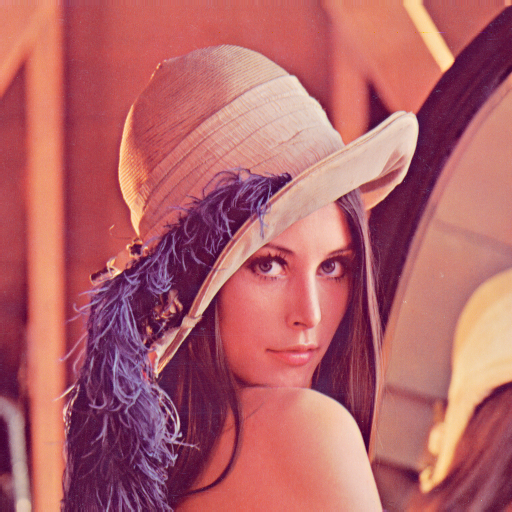

In [50]:
img

In [51]:
# 1

def reduce_pixel_intensity(image: Image.Image, reduction_power: int):
    img = np.asarray(image)
    intensity_reduction_factor = 2**reduction_power
    img = (img // intensity_reduction_factor) * intensity_reduction_factor
    return Image.fromarray(img)

def convert_to_intensity_levels(image: Image.Image, number_of_intensity_levels: int):
    number_of_bits_per_channel = 8
    red_power = number_of_bits_per_channel - int(np.log2(number_of_intensity_levels))
    return reduce_pixel_intensity(image, red_power)

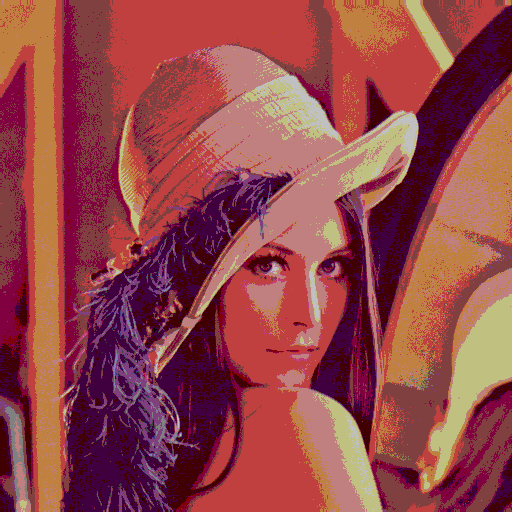

In [57]:
convert_to_intensity_levels(img, 4)

In [87]:
#2 
def avarage_pixels(img: Image.Image, mask_size:3):
    image = np.asarray(img)
    offset = mask_size//2
    # not specified what to do with bounaries. I skip this pixels
    avaraged_image = np.zeros(image.shape)
    for x in range(offset, image.shape[0]-offset):
        for y in range(offset, image.shape[1]-offset):
            for channel in range(image.shape[2]):
                avaraged_image[x, y, channel] = image[x-offset:x+offset, y-offset:y+offset, channel].mean()
    return Image.fromarray(avaraged_image.astype(np.uint8))

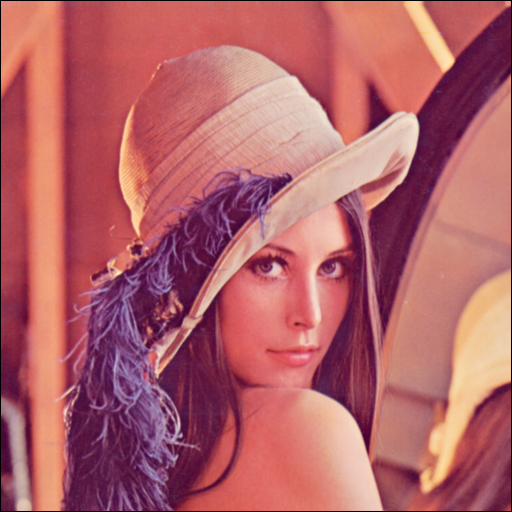

In [88]:
avaraged_image = avarage_pixels(img, 3)
avaraged_image

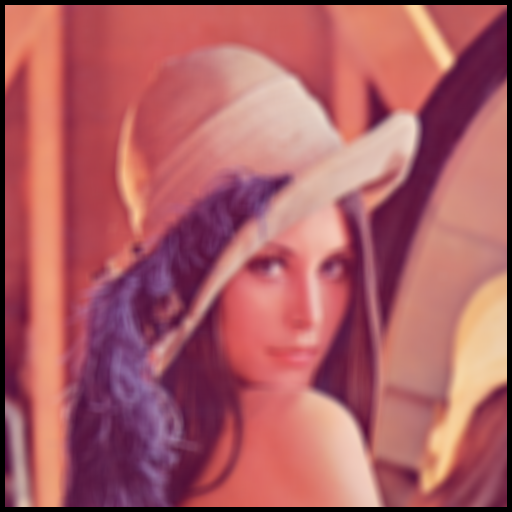

In [89]:
avaraged_image = avarage_pixels(img, 11)
avaraged_image

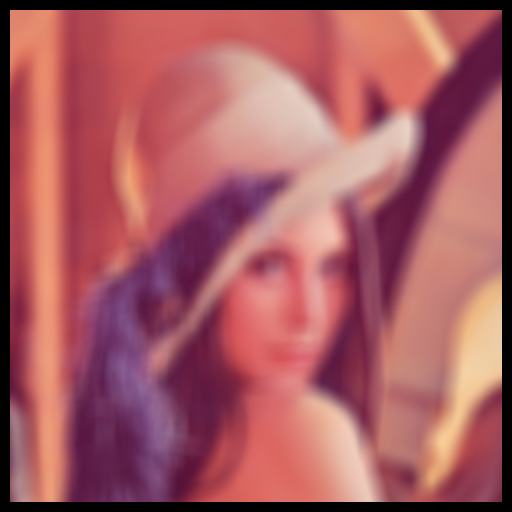

In [93]:
avaraged_image = avarage_pixels(img, 20)
avaraged_image

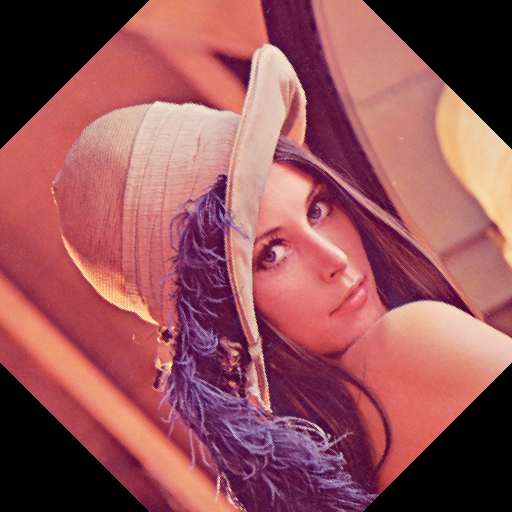

In [91]:
#3 
img.rotate(45)

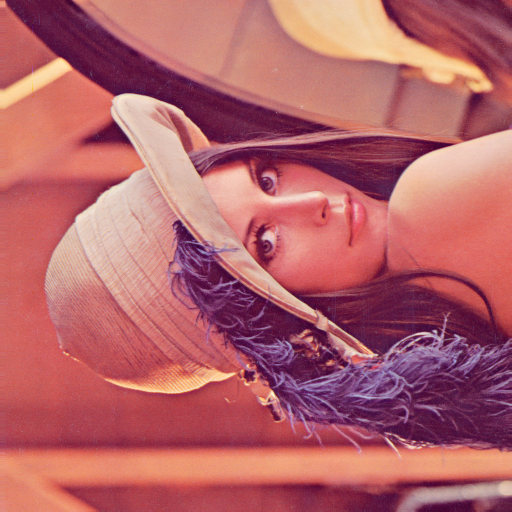

In [92]:
img.rotate(90)

In [103]:
#4
def reduce_spatial_resolution(image: Image.Image, filter_size=3):
    image = np.asarray(img)
    offset = filter_size//2
    # not specified what to do with bounaries. I skip this pixels
    reduced_image = np.zeros((image.shape[0]//filter_size, image.shape[1]//filter_size, image.shape[2]))
    for new_x, x in zip(range(reduced_image.shape[0]), range(offset, image.shape[0], filter_size)):
        for new_y, y in zip(range(reduced_image.shape[1]), range(offset, image.shape[1], filter_size)):
            for channel in range(image.shape[2]):
                reduced_image[new_x, new_y, channel] = image[x-offset:x+offset, y-offset:y+offset, channel].mean()
    return Image.fromarray(reduced_image.astype(np.uint8))

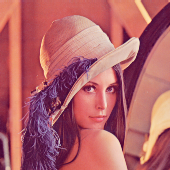

In [104]:
reduce_spatial_resolution(img, 3)

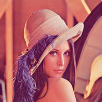

In [105]:
reduce_spatial_resolution(img, 5)

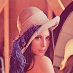

In [106]:
reduce_spatial_resolution(img, 7)